In [13]:
#import all nessary libraries
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#read exel data
df = pd.read_excel('C:\\Users\\ADMIN\\Downloads\\GygaRainfedMaizeSubSaharanAfrica (1).xlsx', sheet_name='Station')

In [15]:
df.head()

,STATIONNAME,LONGITUDE,LATITUDE,ELEVATION_METER,COUNTRY,CROP,YA,YW,YW-YA,YP,...,WPA,CROPPING_INTENSITY,YW_CV_TEMPORAL,YP_CV_TEMPORAL,YA_CV_TEMPORAL,CLIMATEZONE,AREA_IN_CLIMATEZONE_HA,MIN_N_INPUT_TARGET_30_PERC,MIN_N_INPUT_TARGET_50_PERC,MIN_N_INPUT_TARGET_80_PERC
0,Bobo-Dioulasso,-4.317,11.167,445.0,Burkina Faso,Rainfed maize,1.881295,8.803804,6.922509,10.657895,...,4.869042,1.0,0.194382,0.032700,0.162893,10301,158555,53.356388,88.927314,149.026281
1,Bogandé,-0.137,12.974,281.0,Burkina Faso,Rainfed maize,1.002378,5.276038,4.273660,10.055556,...,2.730161,1.0,0.646120,0.048145,0.175539,10101,32846,31.975989,53.293315,89.310069
2,Boromo,-2.933,11.750,243.0,Burkina Faso,Rainfed maize,1.461313,8.380198,6.918885,10.077778,...,3.920883,1.0,0.240237,0.057815,0.199634,10201,161472,50.789079,84.648465,141.855695
3,Dédougou,-3.483,12.467,299.0,Burkina Faso,Rainfed maize,1.474030,5.845895,4.371865,10.057895,...,3.935390,1.0,0.571344,0.048177,0.201487,10201,58791,35.429665,59.049442,98.956309
4,Fada Ngourma,0.367,12.033,294.0,Burkina Faso,Rainfed maize,1.344819,6.625926,5.281107,10.416667,...,3.744870,1.0,0.411372,0.047632,0.153830,10201,48289,40.157127,66.928545,112.160277


## Data cleaning

In [16]:
# check for missing values
df.isnull().sum()   


STATIONNAME                    0
LONGITUDE                      0
LATITUDE                       0
ELEVATION_METER                2
COUNTRY                        0
CROP                           0
YA                             0
YW                             0
YW-YA                          0
YP                             0
YP-YA                          0
WPP                            0
WPA                            0
CROPPING_INTENSITY             0
YW_CV_TEMPORAL                 0
YP_CV_TEMPORAL                 0
YA_CV_TEMPORAL                27
CLIMATEZONE                    0
AREA_IN_CLIMATEZONE_HA         0
MIN_N_INPUT_TARGET_30_PERC     0
MIN_N_INPUT_TARGET_50_PERC     0
MIN_N_INPUT_TARGET_80_PERC     0
dtype: int64

In [17]:
df.shape

(105, 22)

## Handling outliers

<Axes: xlabel='MIN_N_INPUT_TARGET_80_PERC'>

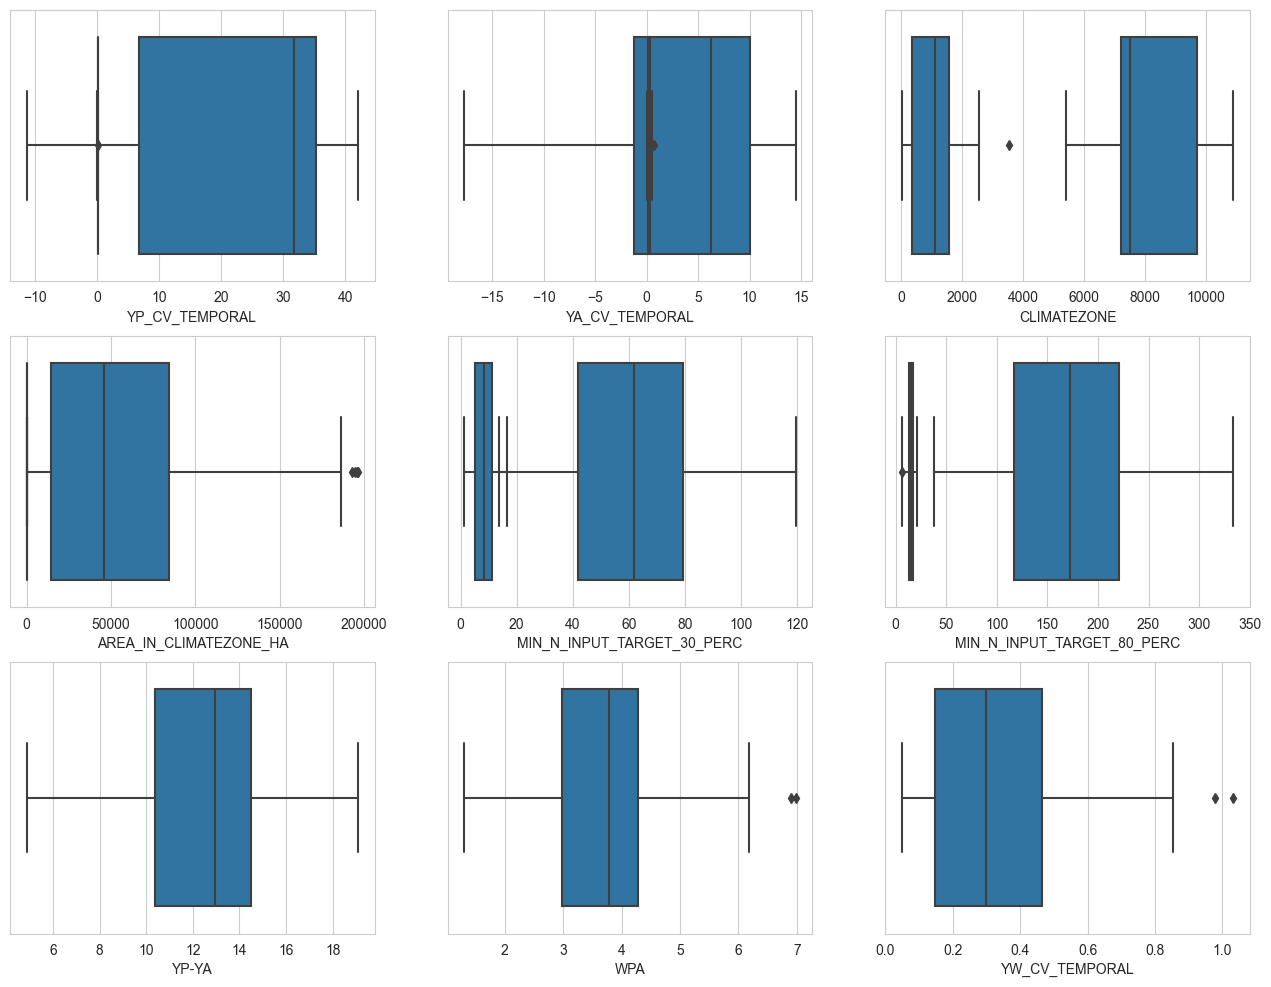

In [18]:
# How we are  treating the outliers ?

#By using a Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. 
#Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
#Box Plot :- to analyse the distribution and see the outliers
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='LONGITUDE',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='LATITUDE',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='ELEVATION_METER',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='YW',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='YW-YA',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='YP',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='YP-YA',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='WPA',data=df)
plt.subplot(3,3,9)
sns.boxplot(x='YW_CV_TEMPORAL',data=df)
plt.subplot(3,3,1)
sns.boxplot(x='YP_CV_TEMPORAL',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='YA_CV_TEMPORAL',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='CLIMATEZONE',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='AREA_IN_CLIMATEZONE_HA',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='MIN_N_INPUT_TARGET_30_PERC',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='MIN_N_INPUT_TARGET_80_PERC',data=df)

In [19]:
from sklearn.preprocessing import QuantileTransformer
x=df.drop(['STATIONNAME','COUNTRY','CROP'],axis=1)
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['LONGITUDE', 'LATITUDE','ELEVATION_METER','YA','YW','YW-YA','YP','YP-YA', 'WPP','WPA','CROPPING_INTENSITY','YW_CV_TEMPORAL','YP_CV_TEMPORAL','YA_CV_TEMPORAL','CLIMATEZONE','AREA_IN_CLIMATEZONE_HA','MIN_N_INPUT_TARGET_30_PERC','MIN_N_INPUT_TARGET_50_PERC','MIN_N_INPUT_TARGET_80_PERC']
df1=df_new

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (105). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [20]:
# drop text columns
df = df.drop(['STATIONNAME', 'COUNTRY','CROP','YA_CV_TEMPORAL','CROP','ELEVATION_METER','LONGITUDE', 'LATITUDE','MIN_N_INPUT_TARGET_30_PERC',
       'MIN_N_INPUT_TARGET_50_PERC', 'MIN_N_INPUT_TARGET_80_PERC','YP-YA','YW-YA'], axis=1)

In [21]:
# show all columns
df1.columns

Index(['LONGITUDE', 'LATITUDE', 'ELEVATION_METER', 'YA', 'YW', 'YW-YA', 'YP',
       'YP-YA', 'WPP', 'WPA', 'CROPPING_INTENSITY', 'YW_CV_TEMPORAL',
       'YP_CV_TEMPORAL', 'YA_CV_TEMPORAL', 'CLIMATEZONE',
       'AREA_IN_CLIMATEZONE_HA', 'MIN_N_INPUT_TARGET_30_PERC',
       'MIN_N_INPUT_TARGET_50_PERC', 'MIN_N_INPUT_TARGET_80_PERC'],
      dtype='object')

## Data Train

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop(['YA'], axis=1)
y = df['YA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Create a linear regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the accuracy score of the predictions
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

# accuracy score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy for r2 score:", score)

Mean Squared Error: 0.01064560940474549
Accuracy: 0.9790859655842836
Accuracy for r2 score: 0.9790859655842836


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Create a random forest regressor and fit it to the training data
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the accuracy score of the predictions
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

# accuracy score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy for r2 score:", score)

Mean Squared Error: 0.09120048410284007
Accuracy: 0.8208303544927599
Accuracy for r2 score: 0.8208303544927599


In [25]:
df1.columns

Index(['LONGITUDE', 'LATITUDE', 'ELEVATION_METER', 'YA', 'YW', 'YW-YA', 'YP',
       'YP-YA', 'WPP', 'WPA', 'CROPPING_INTENSITY', 'YW_CV_TEMPORAL',
       'YP_CV_TEMPORAL', 'YA_CV_TEMPORAL', 'CLIMATEZONE',
       'AREA_IN_CLIMATEZONE_HA', 'MIN_N_INPUT_TARGET_30_PERC',
       'MIN_N_INPUT_TARGET_50_PERC', 'MIN_N_INPUT_TARGET_80_PERC'],
      dtype='object')

## Hyperparametization

In [26]:
#train test split
from sklearn.model_selection import train_test_split
X = df1.drop(['YA','YA_CV_TEMPORAL','ELEVATION_METER','LONGITUDE', 'LATITUDE','MIN_N_INPUT_TARGET_30_PERC',
       'MIN_N_INPUT_TARGET_50_PERC', 'MIN_N_INPUT_TARGET_80_PERC','YP-YA','YW-YA'], axis=1)
y = df1['YA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Fitting the random forest regressor model with the best hyperparameters

In [32]:
# Create a random forest regressor and fit it to the training data
rf = RandomForestRegressor(random_state=0, n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the accuracy score of the predictions
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

# accuracy score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy for r2 score:", score)

Mean Squared Error: 0.011672460213141677
Accuracy: 0.8787771281782472
Accuracy for r2 score: 0.8787771281782472


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a decision tree regressor and fit it to the training data
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the accuracy score of the predictions
accuracy = dt.score(X_test, y_test)
print("Accuracy:", accuracy)

# accuracy score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy for r2 score:", score)

Mean Squared Error: 0.021862865199704158
Accuracy: 0.7729459550630016
Accuracy for r2 score: 0.7729459550630016


In [35]:
#save the model to a pickle file
import pickle
pickle_out = open("optimum_model.pkl","wb")
pickle.dump(lr, open('optimum_model.pkl','wb'))
pickle_out.close()
print('The model has been trained and saved to a pickle file')

The model has been trained and saved to a pickle file


In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

ValueError: continuous is not supported